# Communities Detections

https://cdlib.readthedocs.io/

https://networkx.org/documentation/stable/

https://netgraph.readthedocs.io/en/latest/index.html


data : https://networks.skewed.de/

References
[1] Girvan, Michelle & Newman, Mark. (2001). “Community structure in social and biological networks,” proc natl acad sci. 99. 7821–7826.

[2] Blondel, V., Guillaume, J., Lambiotte, R. and Lefebvre, E., 2008. Fast unfolding of communities in large networks. IOPscience. 

[3] Traag, V., Aldecoa, R. and Delvenne, J., 2015. Detecting communities using asymptotical surprise. PHYSICAL REVIEW. 

[4] V. A. Traag, L. Waltman, and N. J. van Eck, “From Louvain to Leiden: guaranteeing well-connected communities,” Sci. Rep., vol. 9, no. 1, pp. 1–12, 2019, doi: 10.1038/s41598–019–41695-z. 

[5] Pons, P. and Latapy, M., n.d. Computing communities in large networks using random walks. 

In [1]:
import pandas as pd
from cdlib import algorithms, viz
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
def assign_node_colors(node_to_community, colormap_name='tab10'):
    """
    Automatically assigns distinct colors to nodes based on their community.

    Parameters:
        node_to_community (dict): A dictionary mapping nodes to community IDs.
        colormap_name (str): The name of the Matplotlib colormap to use. Default is 'tab10'.

    Returns:
        dict: A dictionary mapping nodes to their assigned colors.
    """
    unique_communities = set(node_to_community.values())
    num_communities = len(unique_communities)
    colormap = cm.get_cmap(colormap_name, num_communities)
    colors = [mcolors.rgb2hex(colormap(i)) for i in range(num_communities)]
    community_to_color = {community_id: colors[i] for i, community_id in enumerate(unique_communities)}
    return {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

In [26]:
# Define the paths to the .txt files
txt_files = [
    r'/mnt/g/#Skripsi/#StudyCase/Plan 1 (SNA)/Study Case #1 (Stat UGM Instagram)/stat17.txt',
#    r'/mnt/g/#Skripsi/#StudyCase/Plan 1 (SNA)/Study Case #1 (Stat UGM Instagram)/stat18.txt',
    r'/mnt/g/#Skripsi/#StudyCase/Plan 1 (SNA)/Study Case #1 (Stat UGM Instagram)/stat19.txt',
#    r'/mnt/g/#Skripsi/#StudyCase/Plan 1 (SNA)/Study Case #1 (Stat UGM Instagram)/stat20.txt'
]

# Load the .txt files into a set of nodes
valid_nodes = set()
for file in txt_files:
    with open(file, 'r') as f:
        # Add all the nodes from the txt file to the set
        valid_nodes.update(line.strip() for line in f.readlines())

# Load the network data from CSV
file_path = r'/mnt/g/#Skripsi/#StudyCase/Plan 1 (SNA)/Study Case #1 (Stat UGM Instagram)/Network Data/#UniGraph Network (22-01-2025).csv'
data = pd.read_csv(file_path)

# Filter the data to keep only the rows where both nodes are in the valid nodes list
filtered_data = data[data['node_1'].isin(valid_nodes) & data['node_2'].isin(valid_nodes)]

G = nx.Graph()

# Add nodes from the two sets (assuming node_1 and node_2 are two different sets)
set_1 = set(filtered_data['node_1'])
set_2 = set(filtered_data['node_2'])

# Add nodes to the bipartite graph
G.add_nodes_from(set_1, bipartite=0)  # Set 1
G.add_nodes_from(set_2, bipartite=1)  # Set 2

# Add edges from the filtered data
edges = [(row['node_1'], row['node_2']) for _, row in filtered_data.iterrows()]
G.add_edges_from(edges)



# Stochastic Block Models Nested

The SBM framework is based on assigning each node to a latent community and defining a probability matrix \(P\), where \(P_{ij}\) represents the probability of an edge existing between a node in community \(i\) and a node in community \(j\). The model then generates the network by drawing edges independently based on these probabilities.

The process of detecting communities using SBMs involves two main steps:

1. **Inference of Community Assignments**  
   The goal is to assign each node to a community such that the observed network structure is most likely under the model. Common approaches for inference include maximum-likelihood estimation, Bayesian methods, and variational approximations. These methods aim to maximize the likelihood of the observed network given the community assignments and the edge probability matrix.

2. **Estimation of Edge Probabilities**  
   After determining the community assignments, the probability matrix \(P\) is estimated based on the observed edge densities within and between communities. This matrix provides insights into the interaction patterns across the network.

SBMs are particularly useful for identifying community structures in networks with varying degrees of connectivity between and within groups. They are flexible and can be extended to incorporate additional features, such as weighted edges, overlapping communities, or temporal dynamics.

One major strength of SBMs is their probabilistic foundation, which provides a clear and interpretable framework for community detection. However, they can be computationally intensive for large-scale networks, and their performance heavily depends on the accuracy of the chosen inference method. Despite these challenges, SBMs remain a powerful tool for exploring the structure of complex networks, particularly in scenarios where probabilistic modeling is advantageous.

In [25]:
partition = algorithms.sbm_dl_nested(G)

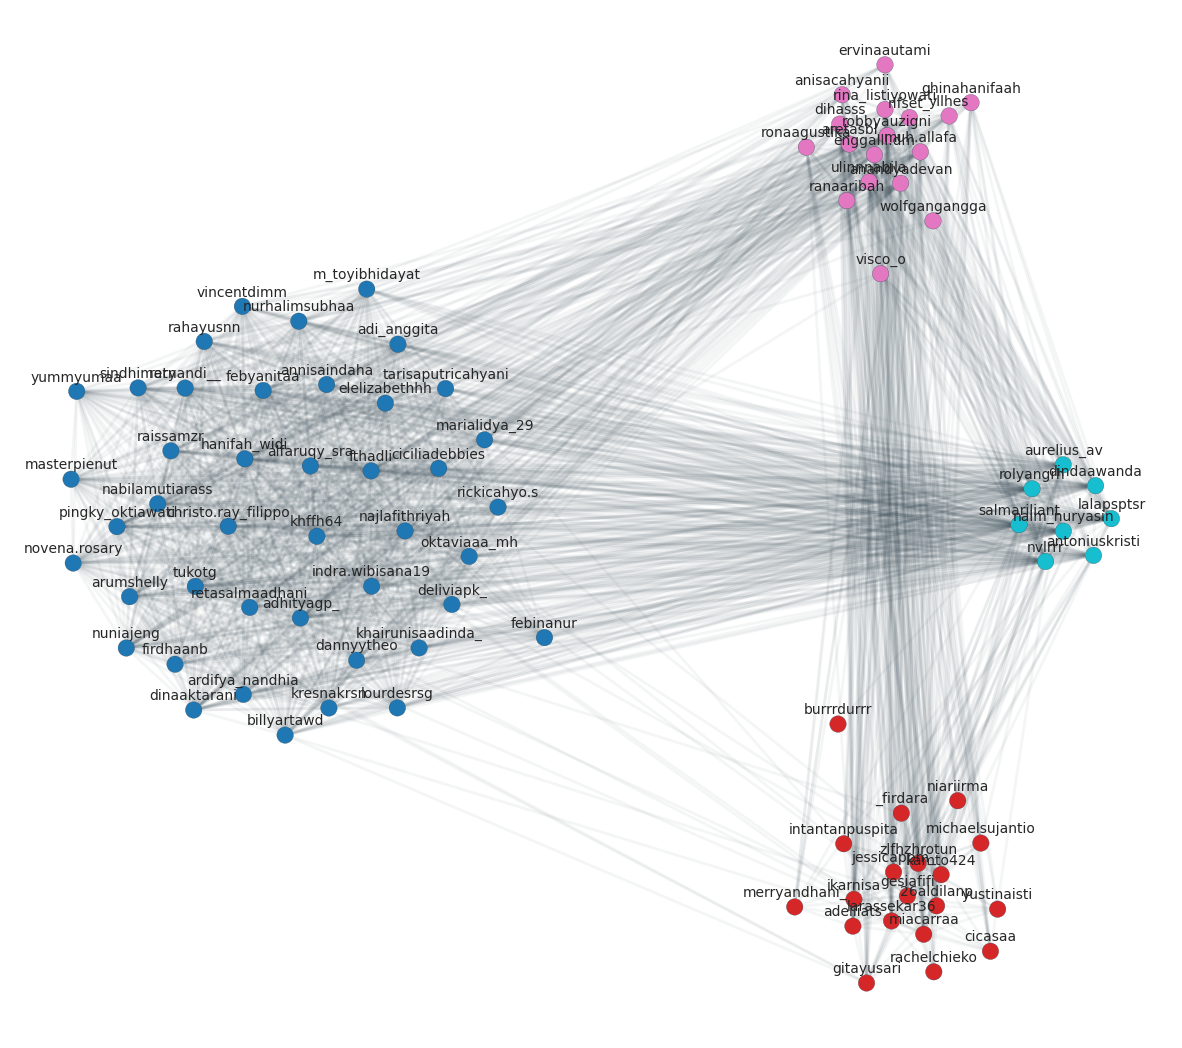

In [26]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Louvain

Louvain community detection algorithm was originally proposed in 2008 as a fast community unfolding method for large networks. This approach is based on modularity, which tries to maximize the difference between the actual number of edges in a community and the expected number of edges in the community. However optimizing modularity in a network is NP-hard, therefore have to use heuristics. Louvain algorithm is divided into iteratively repeating two phases;

Local moving of nodes
Aggregation of the network
The algorithm starts with a weighted network of N nodes. In the first phase, the algorithm assigns a different community to each node of the network. Then for each node, it considered the neighbours and evaluate the gain of modularity by removing the particular node from the current community and placing in the neighbour’s community. The node will be placed in the neighbour’s community if the gain is positive and maximized. The node will remain in the same community if there is no positive gain. This process is applied repeatedly and for all nodes until no further improvement is there. The first phase of the Louvain algorithm stops when a local maxima of modularity is obtained. In the second phase, the algorithm builds a new network considering communities found in the first phase as nodes. Once the second phase is completed, the algorithm will reapply the first phase to the resulting network. These steps are repeated until there are no changes in the network and maximum modularity is obtained.

Louvain community detection algorithm uncovers communities of communities during the process. It is very popular because of the ease of implementation and also the speed of the algorithm. However, one major limitation of the algorithm is the use of storage of the network in the main memory.

The use of the Louvain community detection algorithm using the python cdlib library is given below.

In [27]:
# Apply spring layout
partition = algorithms.louvain(G, resolution=1., randomize=False)
pos = nx.spring_layout(G, iterations=1500)

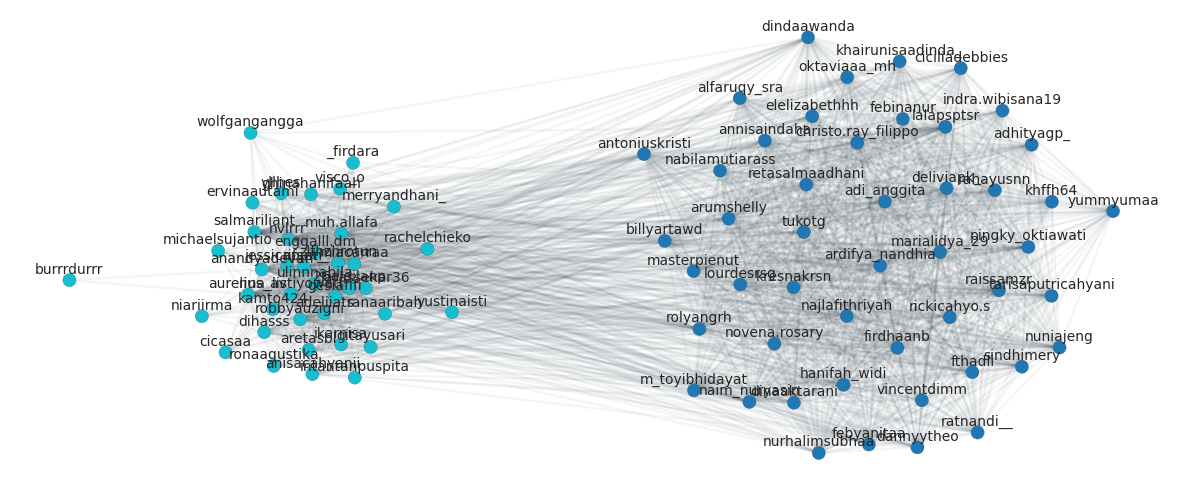

In [28]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Suprise

Due to limitations of the modularity, a measure based on classical probabilities known as Surprise has been introduced to evaluate the quality of a partition of a network into communities. The algorithm is almost similar to the Louvain community detection algorithm except that it uses surprises instead of modularity. Nodes are moved from one community to another such that surprises are greedily improved. This approach considers the probability that a link lies within a community. The use of surprises works well in the limit of many small communities and the use of modularity works well in the limit of a few large communities.

The use of the Surprise community detection algorithm using the python cdlib library is given below.

In [29]:
# Apply spring layout
partition = algorithms.surprise_communities(G)
pos = nx.spring_layout(G, iterations=1500)

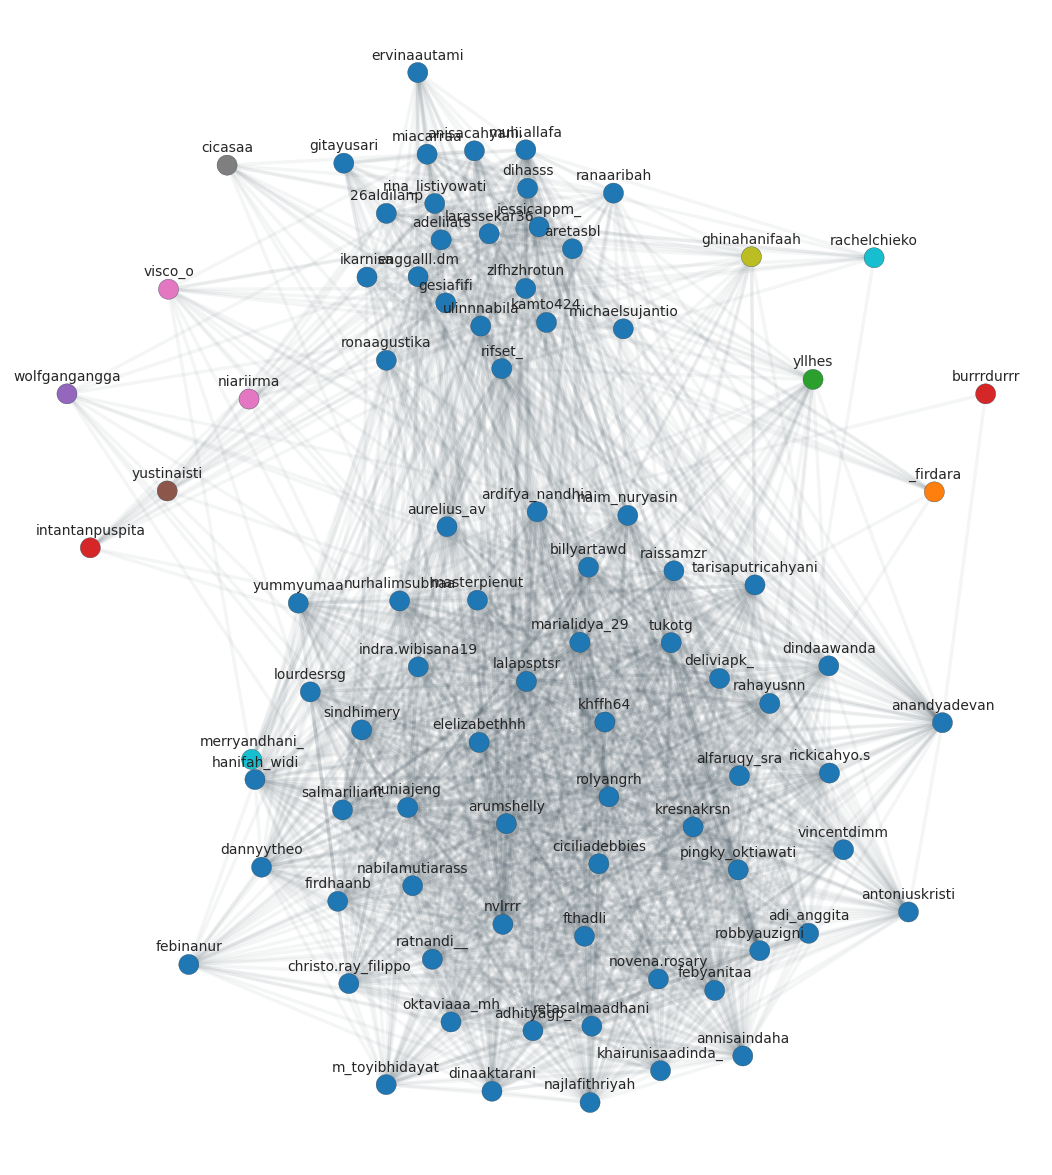

In [30]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

##  Leiden

In later research (2019), V.A. Traag et al. showed that Louvain community detection has a tendency to discover communities that are internally disconnected (badly connected communities). In the Louvain algorithm, moving a node which has acted as a bridge between two components in a community to a new community may disconnect the old community. This won’t be a problem if the old community is being further split. But according to Traag et al., this won’t be the case. Other nodes in the old community allow it to remain as a single community due to their strong connections. Also according to them, Louvain has a tendency to discover very weekly connected communities. Therefore, they have proposed the much faster Leiden algorithm which guarantees that communities are well connected.

Additionally to the phases used in Louvain algorithm, Leiden uses one more phase which tries to refine the discovered partitions. The three-phases in Leiden algorithm are,

Local moving of nodes
Refinement of the partitions
Aggregation of the network based on refined partitions
In the refinement phase, the algorithm tries to identify refined partitions from the partitions proposed by the first phase. Communities proposed by the first phase may further split into multiple partitions in the second phase. The refinement phase does not follow a greedy approach and may merge a node with a randomly chosen community which increases the quality function. This randomness allows discovering the partition space more broadly. Also in the first phase, Leiden follows a different approach to the Louvain. Instead of visiting all the nodes in the network after the first visit to all nodes has been completed, Leiden only visits those nodes whose neighbourhood has changed.

The use of the Leiden community detection algorithm using the python cdlib library is given below.

In [31]:
# Apply spring layout
partition = algorithms.leiden(G)
pos = nx.spring_layout(G, iterations=1500)

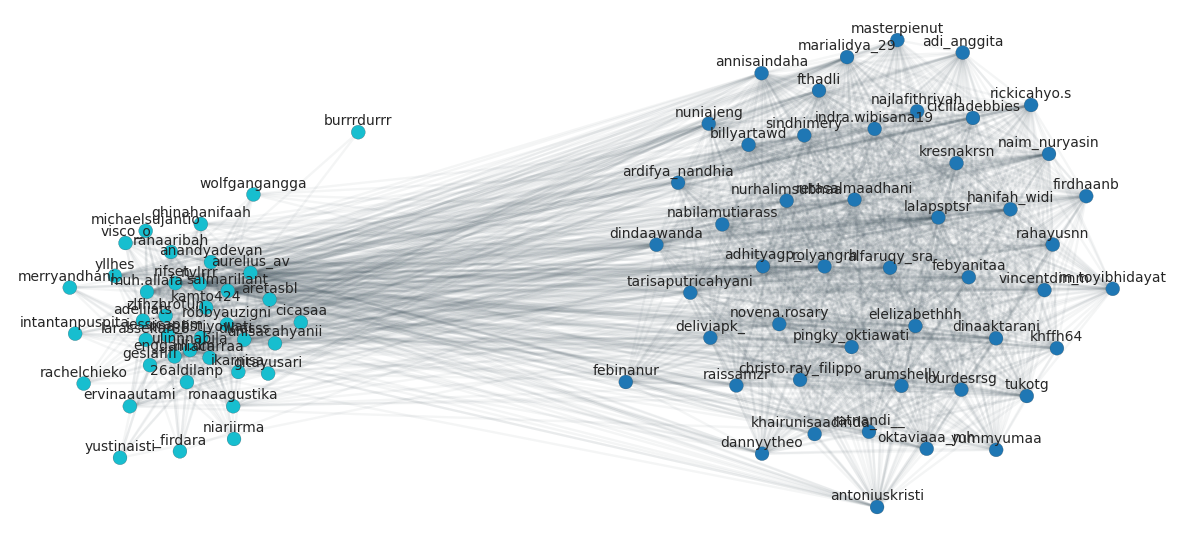

In [32]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Walktrap

Walktrap is another approach for community detection based on random walks in which distance between vertices are measured through random walks in the network. Walktrap is an efficient algorithm which runs in O(mn²) time complexity and O(n²) space complexity in the worst case. But in most real-world scenarios, walktrap runs in O((n²) log n) time complexity and O(n²) space complexity. The basic intuition of the algorithm is that random walks on a graph/ network tend to get trapped into densely connected parts corresponding to communities. Walktrap uses the result of random walks to merge separate communities in a bottom-up manner. Quality of the partitions can be evaluated using any available quality criterion. It can be either modularity as in Louvain community detection or any other measure.

The use of the Walktrap community detection algorithm using the python cdlib library is given below.

In [33]:
# Apply spring layout
partition = algorithms.walktrap(G)
pos = nx.spring_layout(G, iterations=1500)

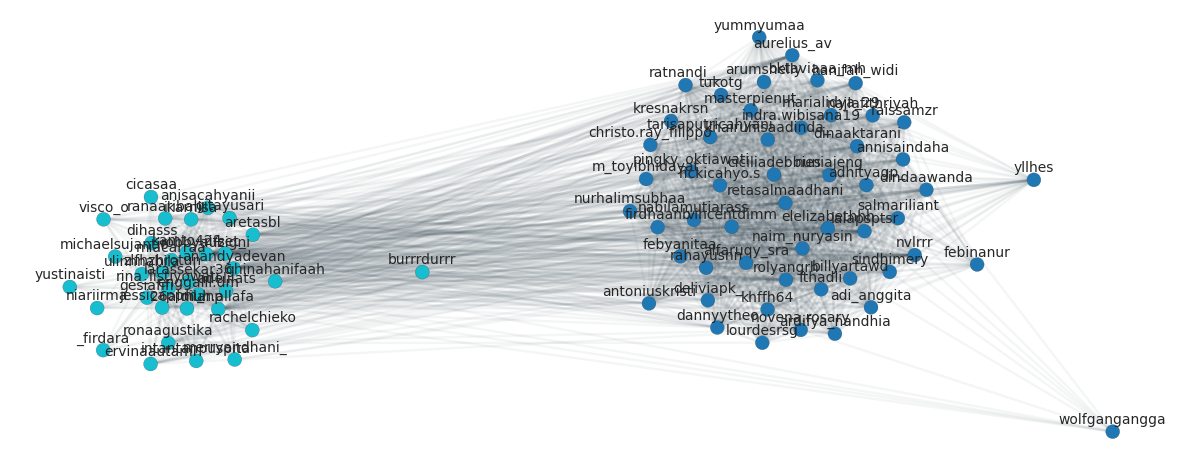

In [34]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Async Fluid

Async Fluid is a community detection algorithm based on the concept of fluid dynamics. The algorithm simulates a fluid flow across the network where nodes represent containers of fluid. The fluid flows asynchronously through the edges, and nodes with similar fluid levels are considered part of the same community. The algorithm operates in a bottom-up manner, iteratively merging communities based on fluid dynamics. The computational complexity of Async Fluid is typically O(n²) for most real-world networks, although it may vary depending on network density. It is known for being efficient in sparse networks and can be evaluated using modularity or other quality measures like conductance.

In [41]:
# Apply spring layout
partition = algorithms.async_fluid(G,k=2)

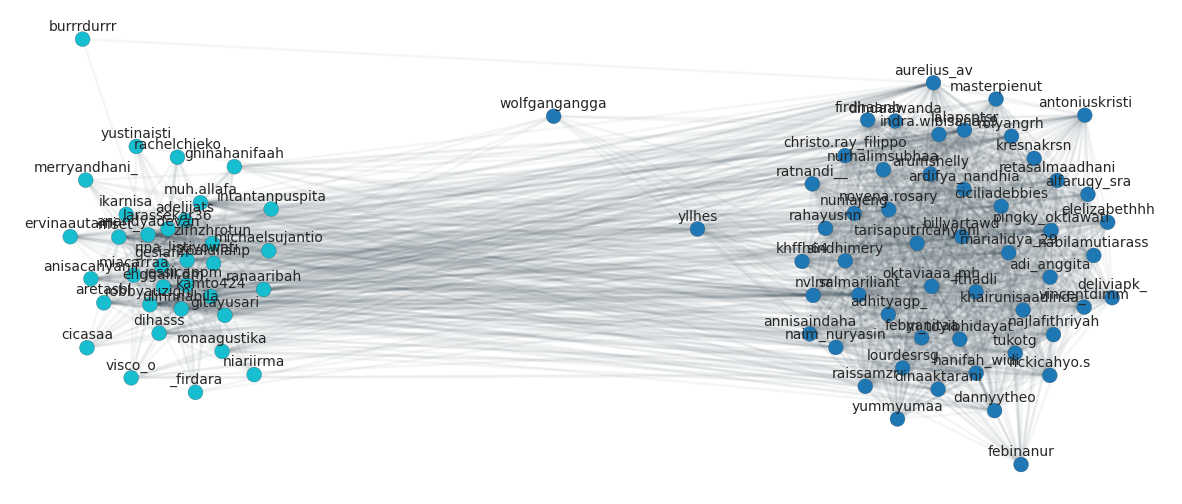

In [42]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Eigenvector

Eigenvector-based community detection utilizes spectral graph theory, focusing on the eigenvectors of the graph's adjacency matrix. The idea is to partition the graph based on the eigenvector corresponding to the largest eigenvalue, which reveals clusters or communities in the network. The algorithm aims to find a division of the network that maximizes the influence of highly connected vertices. The time complexity of Eigenvector-based methods is typically O(n³) due to the matrix computations involved, though optimizations can reduce it. It is an effective method for identifying communities in both dense and sparse networks and is commonly evaluated using modularity or the normalized cut criterion.

In [27]:
# Apply spring layout
partition = algorithms.eigenvector(G)

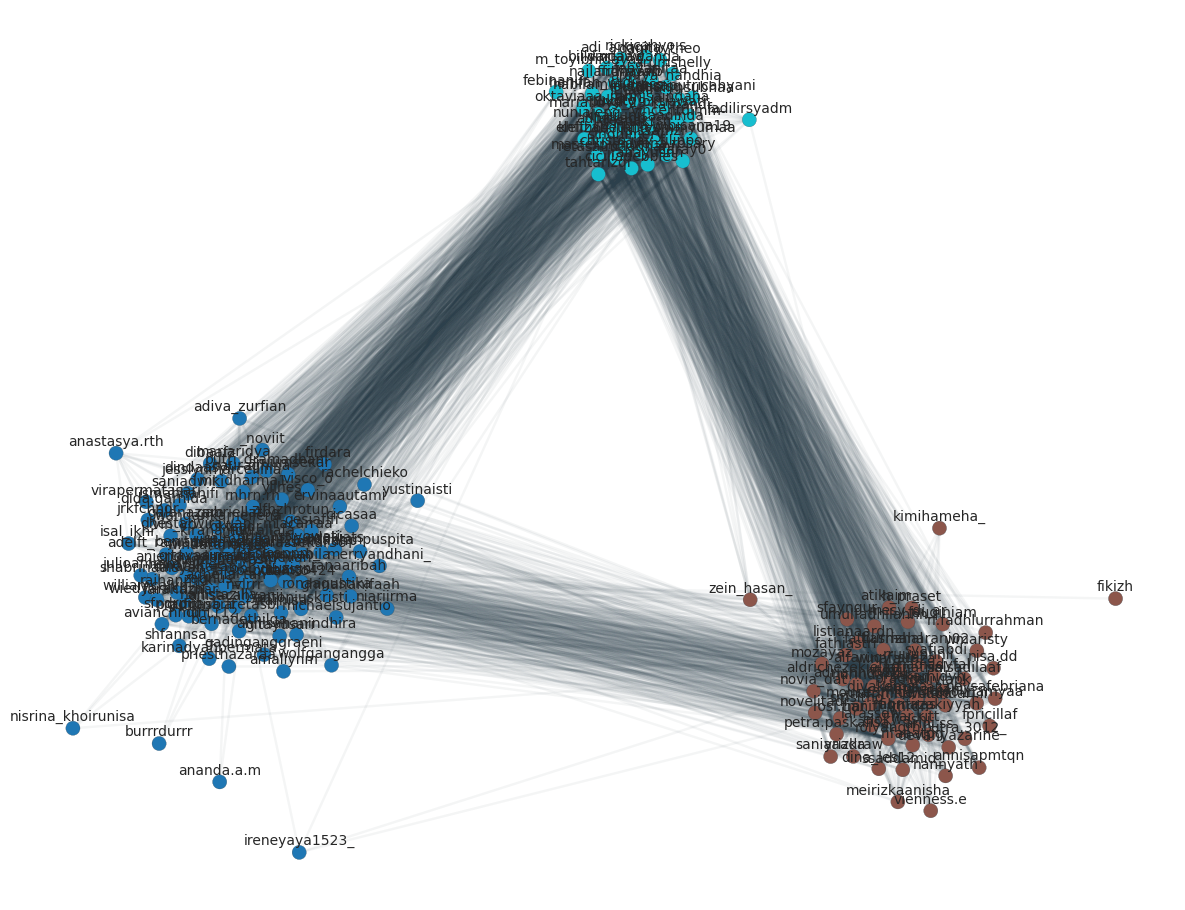

In [18]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

In [28]:
Gvis = G.copy()
centrality = nx.algorithms.degree_centrality(Gvis)
nx.set_node_attributes(Gvis, centrality, 'size')
colors = ['red', 'blue', 'green']
for community, color in zip(partition.communities, colors):
    for node in community:
        Gvis.nodes[node]['color'] = color

In [ ]:
import gravis as gv
gv.d3(Gvis, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3)

## Girvan Newman

Girvan-Newman is a community detection algorithm that focuses on the removal of edges to progressively break down the network into communities. The algorithm works by iteratively removing edges that are most "betweenness-central," meaning they are the most central in terms of shortest paths between other nodes. This method aims to isolate clusters of nodes by gradually removing edges that connect different communities. The time complexity of Girvan-Newman is O(n³), which makes it computationally expensive for large graphs. However, it remains a popular choice for small to medium-sized networks, and community quality is often assessed through modularity or other structural measures.

In [49]:
# Apply spring layout
partition = algorithms.girvan_newman(G, level=2)

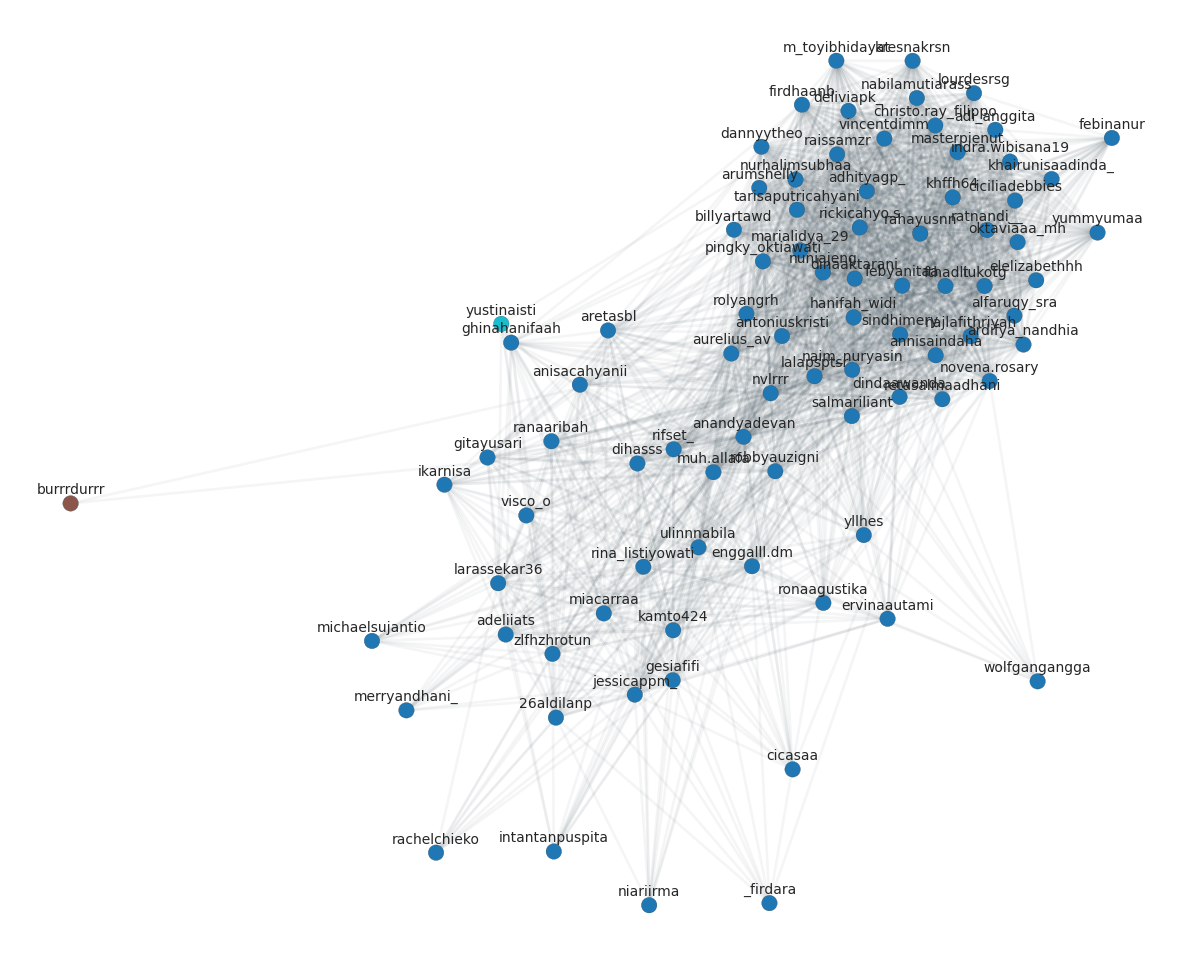

In [50]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Markov Clustering

Markov Clustering (MCL) is a community detection algorithm based on simulation of random walks in a graph using matrix multiplication techniques. The algorithm operates by iteratively inflating and expanding matrices representing the network, where communities are identified as dense clusters of nodes that are strongly connected through random walks. The time complexity of MCL is typically O(n³), but it can be reduced with efficient matrix operations. MCL is known for being scalable and suitable for very large networks. It can be evaluated using modularity or other quality measures, and its effectiveness is often assessed through community consistency and internal clustering density.

In [51]:
# Apply spring layout
partition = algorithms.markov_clustering(G)

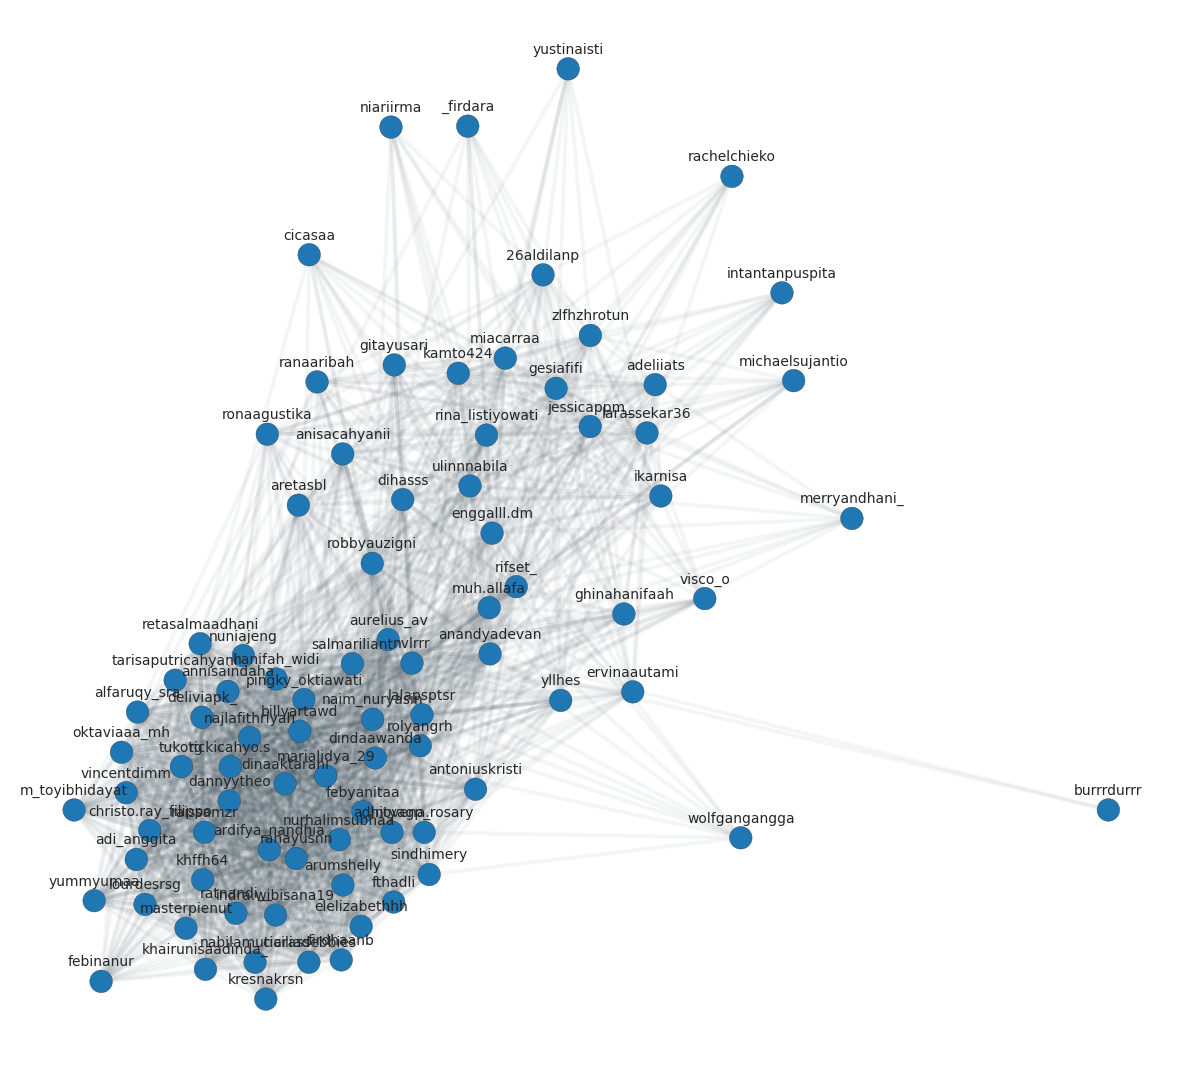

In [52]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

## Spinglass

The Spin Glass model for community detection is inspired by statistical physics, specifically the behavior of spin systems in disordered materials. In this approach, the network is viewed as a system of "spins," and the algorithm seeks to minimize the system's energy by assigning spins to nodes, where nodes with similar spins form communities. The model uses simulated annealing to find the optimal partition by exploring different spin configurations. The time complexity of Spin Glass models depends on the annealing process and is typically O(n²) for many real-world networks. The quality of partitions is evaluated using energy functions, modularity, or other criteria, and the algorithm is especially useful in networks with complex, overlapping community structures.



In [16]:
# Apply spring layout
partition = algorithms.spinglass(G,2)

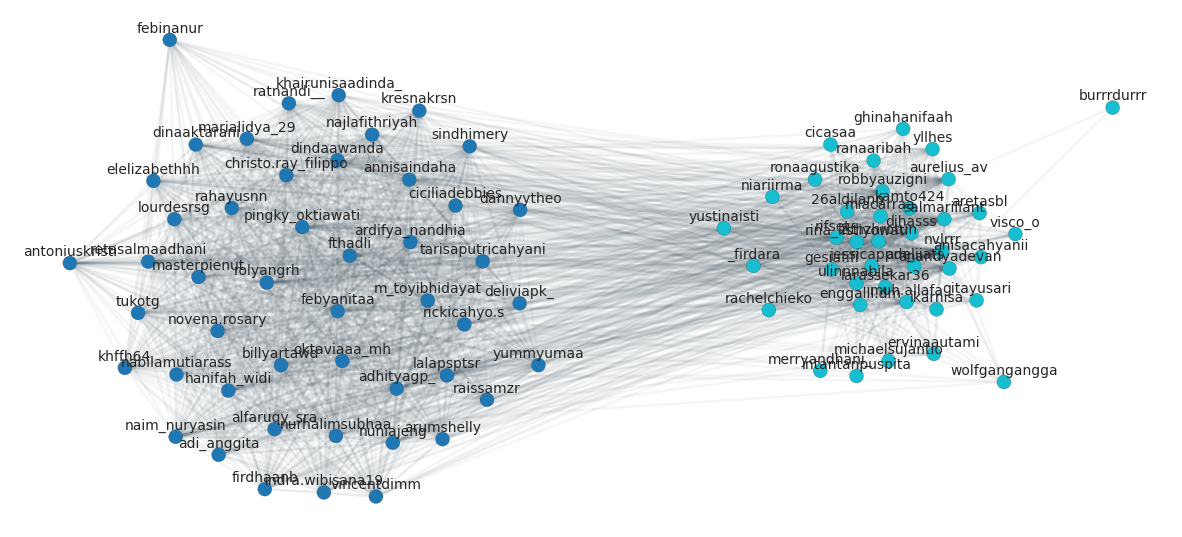

In [17]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()

# Overlapping Communities

## ASLPAw

ASLPAw is a hybrid community detection algorithm that combines the strengths of spectral clustering and random walks, offering an advanced approach for identifying communities in networks. The algorithm first uses an asymmetric version of the Laplacian matrix to perform spectral clustering and then refines the partitioning through Walktrap's random walk-based merging process. ASLPAw runs efficiently with a time complexity of O(n² log n), which makes it suitable for large-scale networks. The quality of the partitions is often assessed using modularity, conductance, or other structural measures, and the algorithm is particularly useful for detecting overlapping communities in networks with varying levels of density.

In [8]:
# Apply spring layout
partition = algorithms.lpam(G, k=2, threshold=0.4, distance = "amp")

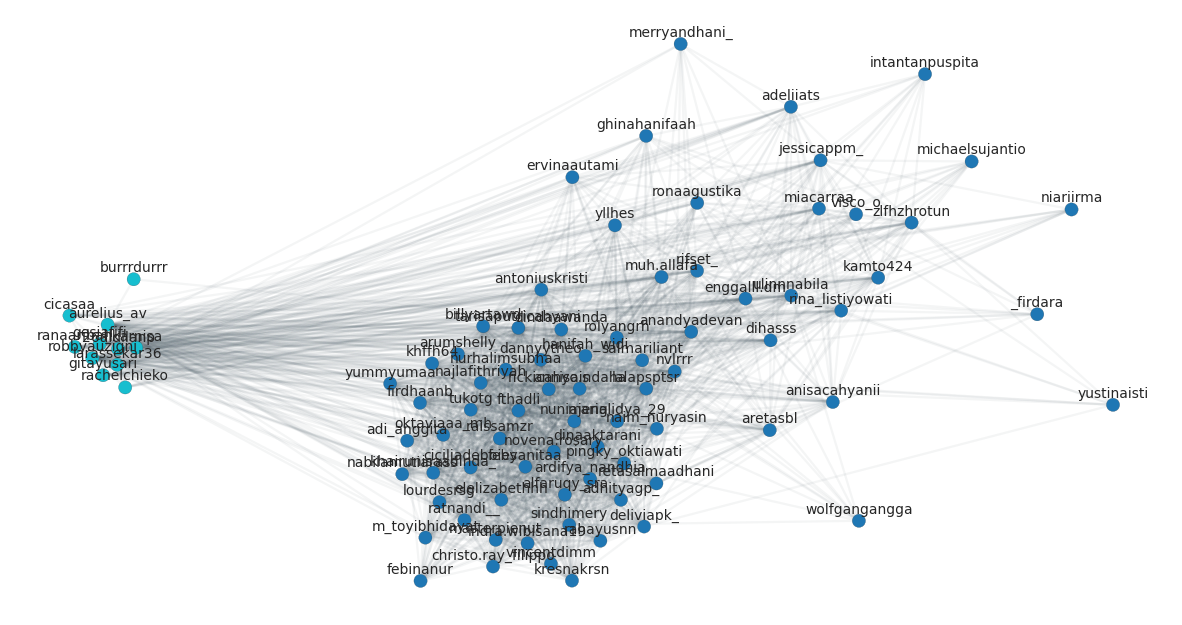

In [9]:
node_to_community = {item: idx for idx, sublist in enumerate(partition.communities) for item in sublist}
node_color = assign_node_colors(node_to_community)

plt.figure(figsize=(15, 15))
Graph(G,
      node_color=node_color, node_labels=True, node_label_offset=(0.0, 0.05),
      node_edge_width=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community), edge_layout_kwargs=dict(k=2000), edge_alpha=0.05, 
      scale=(3, 3), 
)
plt.show()